In [1]:
import numpy as np

from openspeechlib.feature_extraction.utils.delta import delta
from openspeechlib.utils.signal import power
from openspeechlib.utils.windows import extract_overlapping_frames_from_signal, apply_window_function_to_frames

In [2]:
from scipy.io import wavfile

In [36]:
from matplotlib import pyplot as plt
from IPython.display import Audio

In [4]:
frequency, signal = wavfile.read("F_10_1.wav")

In [5]:
frequency

44100

In [6]:
threshold=0.03

In [7]:
signal

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [8]:
signal.shape

(1942272,)

In [30]:
signal = signal[150000:250000]

In [31]:
window_width = int(frequency*0.025)
windows_offset = int(frequency*0.01)
frames = extract_overlapping_frames_from_signal(
    signal,
    window_width,
    windows_offset
)
windowed_frames = apply_window_function_to_frames(frames)
energy = power(windowed_frames, axis=1)
frame_start_time = np.arange(0, signal.shape[-1], windows_offset)
interpolated_values = np.interp(np.arange(0, signal.shape[0]), frame_start_time, energy, )

In [32]:
interpolated_values

array([5.91703311e+08, 5.91149192e+08, 5.90595073e+08, ...,
       2.11287214e+07, 2.11287214e+07, 2.11287214e+07])

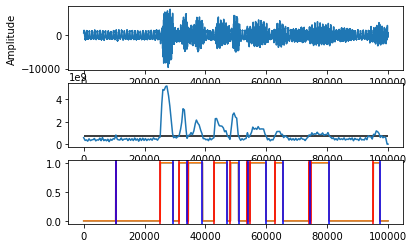

In [41]:

threshold=0.15
signal_size = signal.shape[-1]

plt.subplot(311)
plt.plot(signal)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.subplot(312)
plt.plot(np.arange(0, signal_size), interpolated_values)
plt.hlines(np.max(interpolated_values)*threshold, 0, signal_size)
plt.subplot(313)
voice_ranges = np.where(interpolated_values > np.max(interpolated_values) * threshold, 1, 0)
plt.plot(np.arange(0, signal_size), voice_ranges)
deltas = delta(voice_ranges, (1, -1))
changes_to_positive = np.where(deltas > 0)
changes_to_negative = np.where(deltas < 0)
# zip(changes_to_positive[0], changes_to_negative[0])
plt.plot(np.arange(0, signal_size), voice_ranges)
for positive in changes_to_positive[0]:
    plt.axvline(positive, color='r')
for negative in changes_to_negative[0]:
    plt.axvline(negative, color='b')

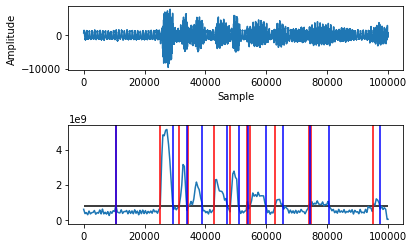

In [38]:
plt.subplot(311)
plt.plot(signal)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.subplot(212)
plt.plot(np.arange(0, signal_size), interpolated_values)
plt.hlines(np.max(interpolated_values)*threshold, 0, signal_size)
voice_ranges = np.where(interpolated_values > np.max(interpolated_values) * threshold, 1, 0)

# plt.plot(np.arange(0, signal_size), voice_ranges)
deltas = delta(voice_ranges, (1, -1))
changes_to_positive = np.where(deltas > 0)
changes_to_negative = np.where(deltas < 0)
# zip(changes_to_positive[0], changes_to_negative[0])
# plt.plot(np.arange(0, signal_size), voice_ranges)
for positive in changes_to_positive[0]:
    plt.axvline(positive, color='r')
for negative in changes_to_negative[0]:
    plt.axvline(negative, color='b')

In [37]:
Audio(data=signal, rate=frequency)

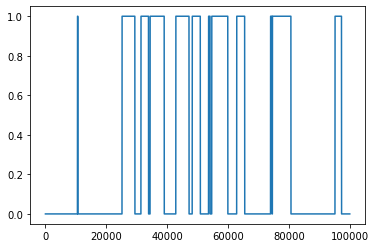

In [35]:
plt.plot(np.arange(0, signal_size), voice_ranges)